<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_AssessmentOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis

## Importing Tools

To analyse the data, the analyst will require the use of pre-written algorithms. To ensure that the algorithms and their associated libraries are easy to find, it is standard to co-locate all required algorithms in one box at the beginning of the coding script.

In [1]:
!pip install yellowbrick
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.ticker as ticker
import time
import xgboost as xgb


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, silhouette_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_samples, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

For this project, an open source dataset from kaggle will be used. The dataset can be obtained from the following location:

https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction/data

The dataset is a collection of customer satisfaction surveys for people who have travelled as a passenger on a commercial airline.

As the coding medium used is 'Google Colab', the dataset has been storedd on Github and will be pulled from that location for the analysis.

In [4]:
file_path = "https://raw.githubusercontent.com/OCE1984/MScDataAnaltyicsPrinciples/main/airline_passenger_satisfaction.csv"
df_original = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

Once the dataset is loaded into the coding environment, the dataset must be analysed to determine the size, shape and content of the dataset. This step is known as Exploratory Data Analysis (EDA) and helps the analyst to understand the dataset before any analysis is carried out.

This will not only direct the analyst in the most suitable types of analysis to use, but also determine whether or not the dataset is configured correctly for data analysis.

In [5]:
print("\nDataset Info:")
df_original.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking       

By looking at the 'info' of the dataset, it's possible to see the structure and the content of the dataset.

First, the number of records contained within the dataset is 129,880 entries. It is recommended that a dataset has a minimum of 500 entries for machine learning algorithms to be effective, so the dataset can be used for machine learning purposes. This is to ensure that there is enough data to split into training and test subsets of the data and still provide enough different combinations of possible data configurations to identify trends.

Next, it's possible to see that there are 24 columns in total, as well as the name of each of the columns within the dataset. This is extremely useful as it allows the analyst to transform the data within any given column contained in the dataset.

Then, it can also be seen how many 'non-null' values there are in each column. If the value is less than the number of entries in the dataset, then that column is gong to have missing values. This can be verified by running a 'missing values' code to clearly show where any missing entries are for any given column.

In [6]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

The 'missing values' code has confirmed that there are 393 missing values from the 'Arrival Delay' column. Before any analysis can be carried out, the null-values will have to be addressed to ensure that they don't influence the accuracy of any modelling carried out. This will be addressed in the next section 'Data Cleaning'.

Finally, the data type (DType), is visible to show what kind of data each column has. The 'Arrival Delay' is a float format, so this will have to be converted to an integer format in the 'Data Cleaning' section.

Now that the dataset is better understood, it is good practice to create a 'Data Dictionary'. The purpose of the dictionary to is communicate to anyone else who needs to interact with the dataset. It explains all the columns and provides the context behind the variables within the columns.

In [7]:
# Generate a Data Dictionary to explain the dataset to others

column_descriptions = {
    "ID": "Unique identifier for each passenger",
    "Gender": "Passenger's gender (Male/Female)",
    "Age": "Passenger's age in years",
    "Customer Type": "Type of customer (Loyal or Disloyal customer)",
    "Type of Travel": "Purpose of flight (Personal or Business)",
    "Class": "Ticket class (Economy, Premium Economy, Business)",
    "Flight Distance": "Distance of the flight in miles",
    "Departure Delay": "Departure delay duration (minutes)",
    "Arrival Delay": "Arrival delay duration (minutes)",
    "Departure and Arrival Time Convenience": "Rating for convenience of departure/arrival times",
    "Ease of Online Booking": "Rating of the ease of online booking, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Check-in Service": "Rating of check-in service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Online Boarding": "Rating of online boarding experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Gate Location": "Rating for convenience/location of gate, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "On-board Service": "Rating for onboard customer service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Seat Comfort": "Rating for comfort of the seats, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Leg Room Service": "Rating for legroom availability, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Cleanliness": "Rating for cleanliness of the aircraft, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Food and Drink": "Rating for onboard food and drink quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Service": "Rating for overall inflight service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Wifi Service": "Rating for onboard wifi service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Entertainment": "Rating for inflight entertainment options, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Baggage Handling": "Rating for baggage handling experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Satisfaction": "Overall passenger satisfaction (Satisfied/Neutral or Dissatisfied)",
}

data_dict = pd.DataFrame({
    "Column Name": df_original.columns,
    "Data Type": df_original.dtypes.values,
    "Description": [column_descriptions.get(col, "No description provided") for col in df_original.columns]
})

data_dict.to_csv("completed_data_dictionary.csv", index=False)

In [8]:
print("\nSummary Statistics:")
df_original.describe()


Summary Statistics:


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [53]:
print("\nSummary Statistics:")
summary_stats = df_original.describe().T
summary_stats = summary_stats.round(1)
print(summary_stats)

# Save to CSV
summary_stats.to_csv("summary_stats.csv", index=True)
print("Summary statistics saved to summary_stats.csv")


Summary Statistics:
                                           count     mean      std   min  \
ID                                      129880.0  64940.5  37493.3   1.0   
Age                                     129880.0     39.4     15.1   7.0   
Flight Distance                         129880.0   1190.3    997.5  31.0   
Departure Delay                         129880.0     14.7     38.1   0.0   
Arrival Delay                           129487.0     15.1     38.5   0.0   
Departure and Arrival Time Convenience  129880.0      3.1      1.5   0.0   
Ease of Online Booking                  129880.0      2.8      1.4   0.0   
Check-in Service                        129880.0      3.3      1.3   0.0   
Online Boarding                         129880.0      3.3      1.4   0.0   
Gate Location                           129880.0      3.0      1.3   0.0   
On-board Service                        129880.0      3.4      1.3   0.0   
Seat Comfort                            129880.0      3.4      1.3 

In [9]:
# Create list of unique values within the categorical type columns
categorical_cols = df_original.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df_original[col].unique()
    print(f"Unique values for '{col}': {unique_values}")

Unique values for 'Gender': ['Male' 'Female']
Unique values for 'Customer Type': ['First-time' 'Returning']
Unique values for 'Type of Travel': ['Business' 'Personal']
Unique values for 'Class': ['Business' 'Economy' 'Economy Plus']
Unique values for 'Satisfaction': ['Neutral or Dissatisfied' 'Satisfied']


In [10]:
# Create a table to show the spread of the data across those unique values
summary_table = pd.DataFrame()

for col in categorical_cols:
    counts = df_original[col].value_counts().reset_index()
    counts.columns = ['Level', 'Count']
    counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100
    counts['Variable'] = col
    summary_table = pd.concat([summary_table, counts], ignore_index=True)


summary_table = summary_table[['Variable', 'Level', 'Count', 'Percentage']]
summary_table

,Variable,Level,Count,Percentage
0,Gender,Female,65899,50.738374
1,Gender,Male,63981,49.261626
2,Customer Type,Returning,106100,81.690791
3,Customer Type,First-time,23780,18.309209
4,Type of Travel,Business,89693,69.058362
5,Type of Travel,Personal,40187,30.941638
6,Class,Business,62160,47.859563
7,Class,Economy,58309,44.894518
8,Class,Economy Plus,9411,7.245919
9,Satisfaction,Neutral or Dissatisfied,73452,56.553742


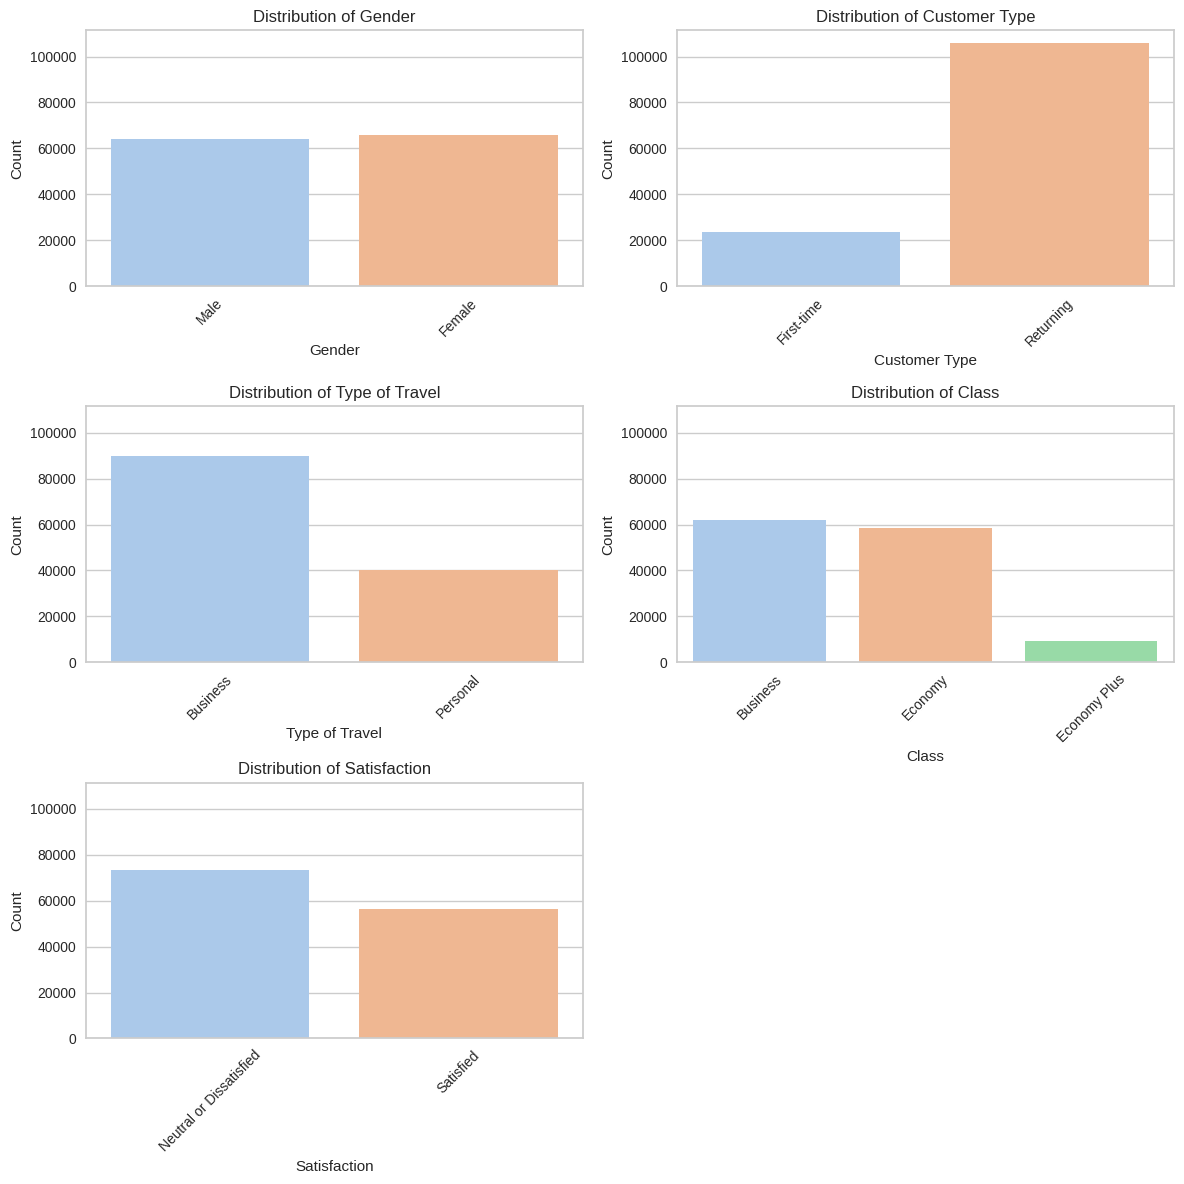

In [11]:
# Visualise the unique values in graphs
categorical_cols = df_original.select_dtypes(include='object').columns

# Create the grid
num_cols = 2
num_rows = math.ceil(len(categorical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()
max_count = 0

# Iterate and plot on subplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_original, x=col, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

    # Update max_count if current plot has a higher count
    current_max = axes[i].get_ylim()[1]
    if current_max > max_count:
        max_count = current_max

# Set ylim for all subplots to the maximum count
for ax in axes:
    ax.set_ylim(0, max_count)

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

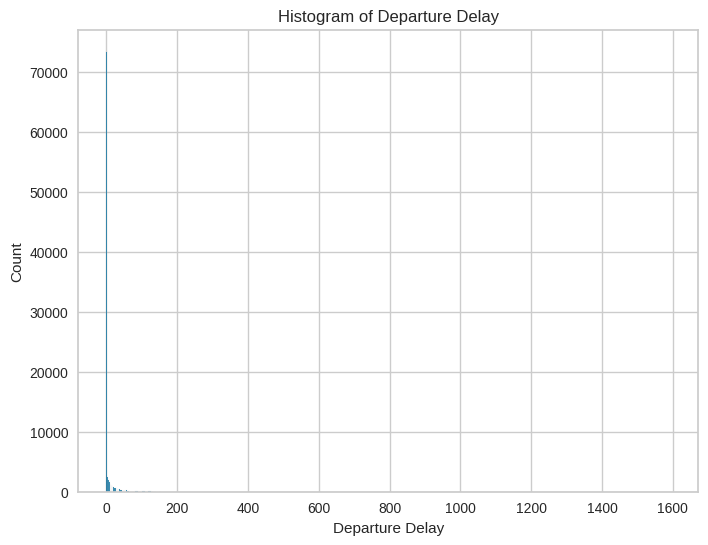

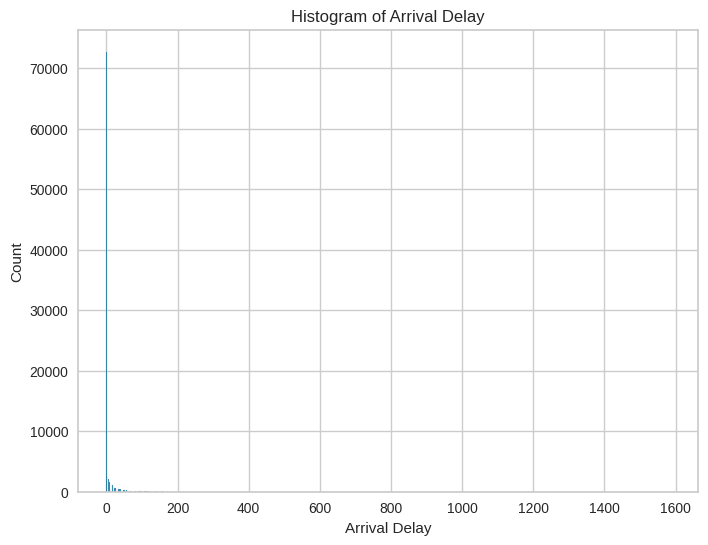

In [12]:
# Create histograms of the Departure_Delay and Arival_Delay
numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns

for col in ['Departure Delay','Arrival Delay']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_original, x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

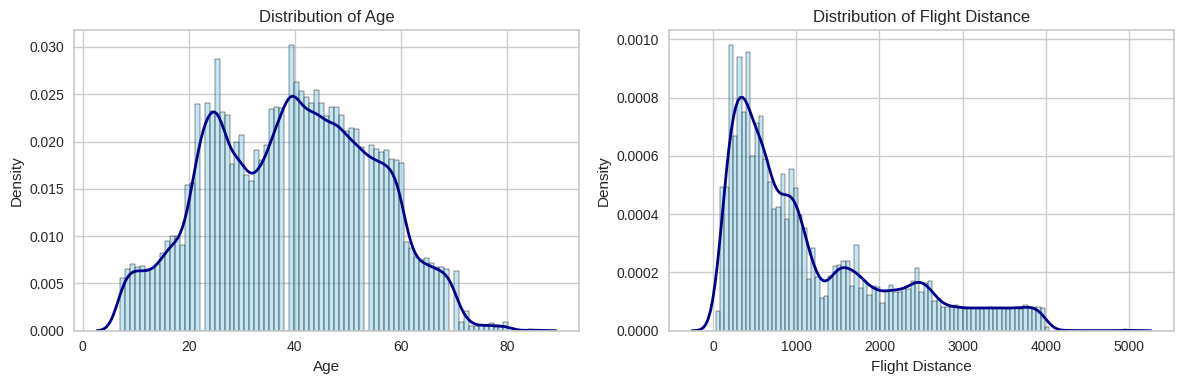

In [13]:
# Generate histograms of Age and Flight Distance
numerical_cols = ['Age', 'Flight Distance']

# Establish subplot grid
num_cols = 2
num_rows = math.ceil(len(numerical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

# Plot histograms with KDE overlayed
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_original, x=col, ax=axes[i],
                 color='skyblue', alpha=0.5, kde=False, stat='density')
    sns.kdeplot(data=df_original, x=col, ax=axes[i], color='darkblue', linewidth=2)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")


for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

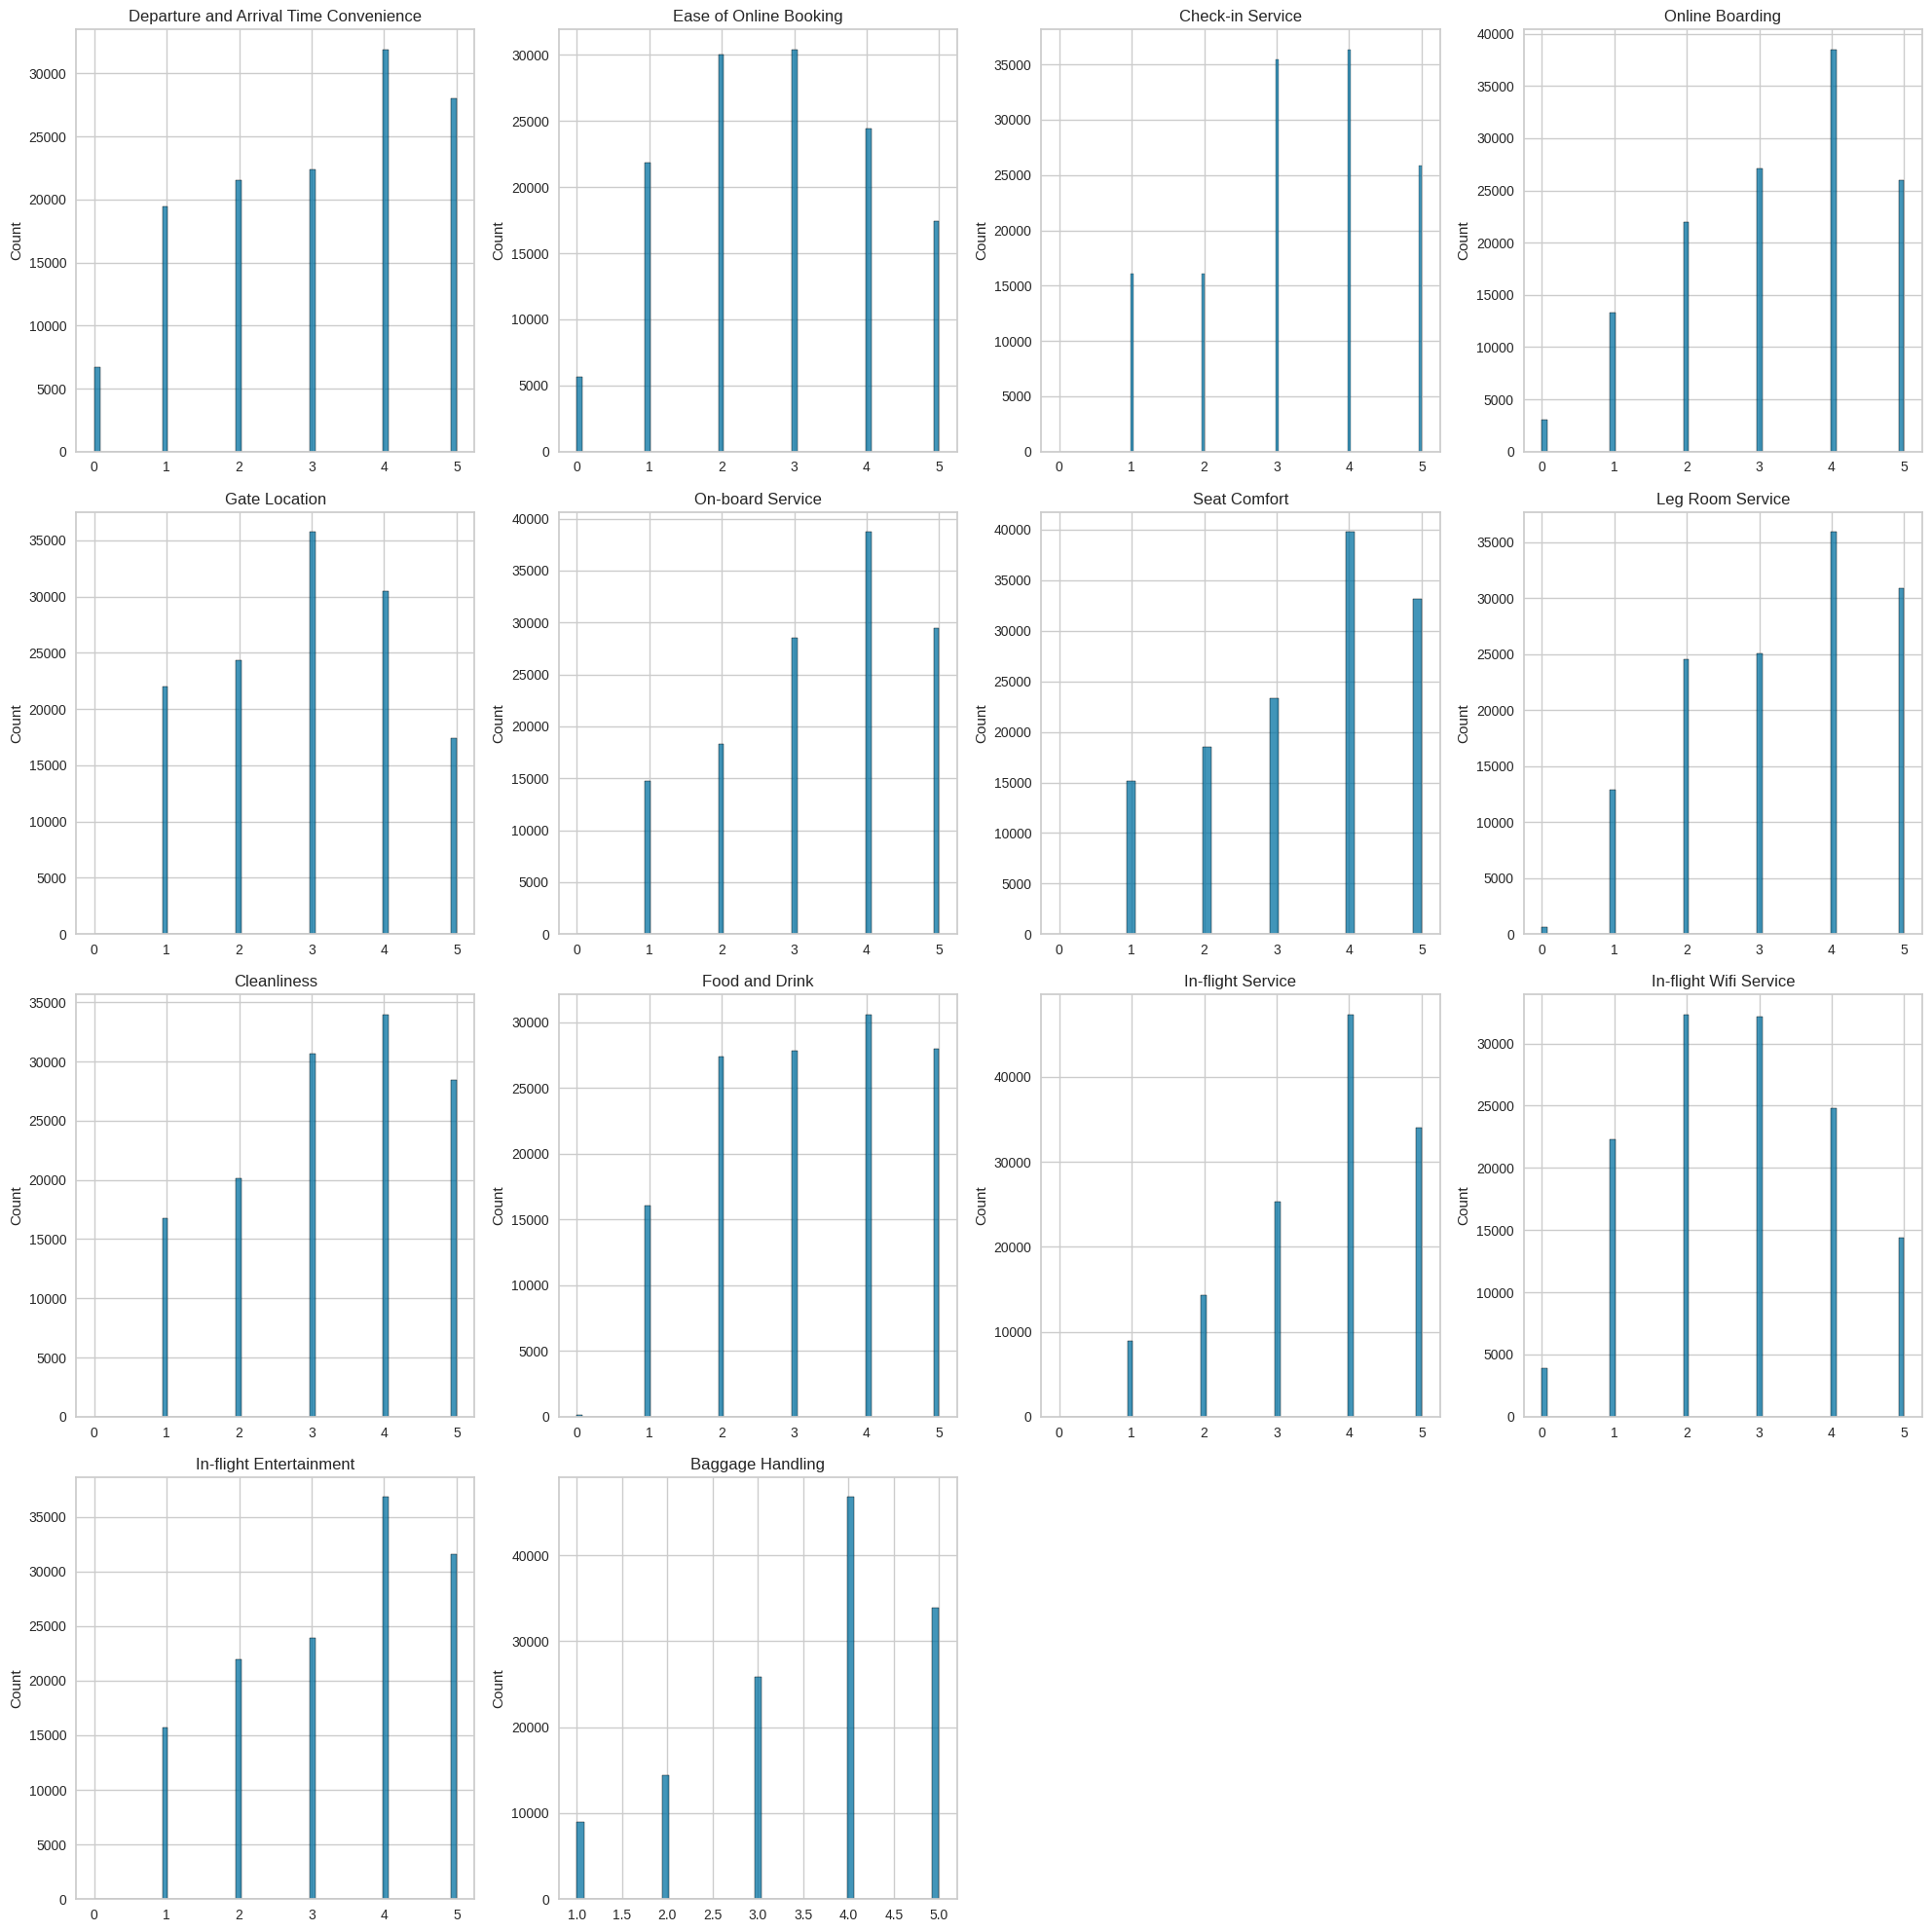

In [14]:
# Create histplots for the ratings columns
columns_to_plot = [
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

# Create the subplot grid
n_cols = 4
n_rows = math.ceil(len(columns_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Create the histplots for each column
for i, col in enumerate(columns_to_plot):
  sns.histplot(df_original[col], ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel("")

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()
plt.show()


We can see 14 integer variables are satisfaction scores varying from 1-5 (with 0 = non applicable):

Departure and Arrival Time Convenience
Ease of Online Booking
Check-in Service
Online Boarding
Gate Location
On Board Service
Seat Comfort
Leg Room Service
Cleanliness
Food and Drink
In-Flight service
In-Flight WiFi service
In-Flight Entertainment
Baggage Handling

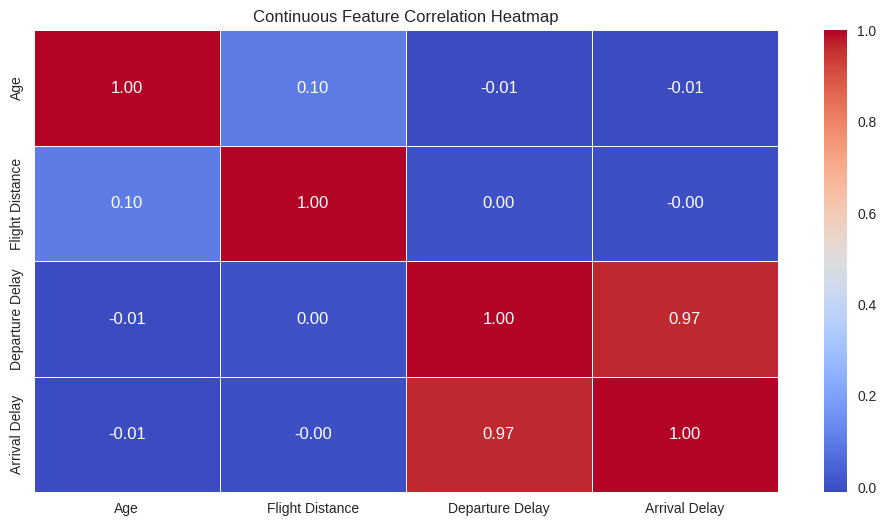

In [15]:
# Generate the Heatmap for the continuous features
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

plt.figure(figsize=(12, 6))
sns.heatmap(df_original[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Continuous Feature Correlation Heatmap")
plt.show()

## Cleaning the Data

In [16]:
# Remove the ID column
df_clean = df_original.copy()
df_clean.drop(columns=["ID"], inplace=True)

In [17]:
# Replace missing Arrival Delay with Departure Delay values
df_clean["Arrival Delay"].fillna(df_clean["Departure Delay"], inplace=True)
df_clean["Arrival Delay"] = df_clean["Arrival Delay"].round().astype(int)

# Verify that there are no more missing values
print("Remaining missing Arrival Delay values:", df_clean["Arrival Delay"].isnull().sum())
print("Data type of Arrival Delay:", df_clean["Arrival Delay"].dtype)

Remaining missing Arrival Delay values: 0
Data type of Arrival Delay: int64


####Scaling

In [18]:
# Scaling the numerical columns for use in Machine Learning algorithms
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

print(df_clean[numerical_cols].head())


        Age  Flight Distance  Departure Delay  Arrival Delay
0  0.566960        -0.370261        -0.333948      -0.263219
1 -0.292868        -0.370261         0.296454       0.617623
2  0.103976        -0.338179        -0.386481      -0.392754
3  0.699242         0.716512        -0.386481      -0.392754
4  0.633101         2.285515        -0.386481      -0.366847


#### **Categorical Variables: Binarisation (0/1) and One Hot Encoding**

Columns with categories were identified as pandas type 'Object'.

In order to make these categorical variables processable by the machine learning algorithms, they need to be converted to numbers. I will convert the categories of binary variables directly to 0 and 1, while for variables with more than one category I will use one-hot encoding.

One-hot encoding is a technique used in data preprocessing to convert categorical data (with more than 2 categories) into a numerical format.  

Step 1: extract binary categorical variables to convert them to 0 and 1

In [19]:
# Convert binary columns to 1's and 0's
encoding_mappings = []

object_cols = df_clean.select_dtypes(include=['object']).columns

# Filter for columns with 2 or fewer unique values
binary_categorical_cols = [col for col in object_cols
                           if df_clean[col].nunique() <= 2]

# Convert binary categorical columns to 0 and 1
for col in binary_categorical_cols:
    unique_values = df_clean[col].unique()
    mapping = {unique_values[0]: 0, unique_values[1]: 1}
    df_clean[col] = df_clean[col].map(mapping)
    encoding_mappings.extend([[col, val, encoded] for val, encoded in mapping.items()])

legend_table = pd.DataFrame(encoding_mappings, columns=["Column Name", "Original Value", "Encoded Value"])

print(legend_table)

      Column Name           Original Value  Encoded Value
0          Gender                     Male              0
1          Gender                   Female              1
2   Customer Type               First-time              0
3   Customer Type                Returning              1
4  Type of Travel                 Business              0
5  Type of Travel                 Personal              1
6    Satisfaction  Neutral or Dissatisfied              0
7    Satisfaction                Satisfied              1


In [20]:
# Check column names
for col in df_clean.columns:
  print(col)

Gender
Age
Customer Type
Type of Travel
Class
Flight Distance
Departure Delay
Arrival Delay
Departure and Arrival Time Convenience
Ease of Online Booking
Check-in Service
Online Boarding
Gate Location
On-board Service
Seat Comfort
Leg Room Service
Cleanliness
Food and Drink
In-flight Service
In-flight Wifi Service
In-flight Entertainment
Baggage Handling
Satisfaction


Step 2: extract categorical variables with more than two categories and One-hot Encode them

In [21]:
# Identify columns to One-hot Encode
cols_to_Onehot_Encode = [col for col in df_clean.select_dtypes(include='object') if df_clean[col].nunique() > 2]

cols_to_Onehot_Encode.extend(['Departure and Arrival Time Convenience','Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'])

cols_to_Onehot_Encode

['Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [22]:
# Carry out the One-hot Encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_clean[cols_to_Onehot_Encode])

encoded_column_names = encoder.get_feature_names_out(cols_to_Onehot_Encode)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_column_names)

In [23]:
# Collate columns back into data frame
df_clean = pd.concat([df_clean, one_hot_df], axis=1)

# Drop the original categorical columns
df_clean = df_clean.drop(columns=cols_to_Onehot_Encode)
df_clean.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Departure Delay', 'Arrival Delay', 'Satisfaction', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus',
       'Departure and Arrival Time Convenience_0',
       'Departure and Arrival Time Convenience_1',
       'Departure and Arrival Time Convenience_2',
       'Departure and Arrival Time Convenience_3',
       'Departure and Arrival Time Convenience_4',
       'Departure and Arrival Time Convenience_5', 'Ease of Online Booking_0',
       'Ease of Online Booking_1', 'Ease of Online Booking_2',
       'Ease of Online Booking_3', 'Ease of Online Booking_4',
       'Ease of Online Booking_5', 'Check-in Service_0', 'Check-in Service_1',
       'Check-in Service_2', 'Check-in Service_3', 'Check-in Service_4',
       'Check-in Service_5', 'Online Boarding_0', 'Online Boarding_1',
       'Online Boarding_2', 'Online Boarding_3', 'Online Boarding_4',
       'Online Boarding_5', 'Gate Location_0',

In [24]:
# Create a table to identify the changes
changes = []

for col in binary_categorical_cols:
    original_values = df_original[col].unique()
    mapping = {original_values[0]: 0, original_values[1]: 1}
    for val, encoded in mapping.items():
        changes.append([col, val, col, f"{encoded} (originally '{val}')"])

specific_encoded_cols = ['Class_Business', 'Class_Economy', 'Class_Economy Plus']

for encoded_col in specific_encoded_cols:
    original_col = 'Class'
    original_val = encoded_col.split('_', 1)[1]

    changes.append([original_col, original_val, encoded_col, "1 if the original value was '" + original_val + "' else 0"])

change_table = pd.DataFrame(changes, columns=["Original Column", "Original Value", "New Column", "New Value Representation"])
change_table

,Original Column,Original Value,New Column,New Value Representation
0,Gender,Male,Gender,0 (originally 'Male')
1,Gender,Female,Gender,1 (originally 'Female')
2,Customer Type,First-time,Customer Type,0 (originally 'First-time')
3,Customer Type,Returning,Customer Type,1 (originally 'Returning')
4,Type of Travel,Business,Type of Travel,0 (originally 'Business')
5,Type of Travel,Personal,Type of Travel,1 (originally 'Personal')
6,Satisfaction,Neutral or Dissatisfied,Satisfaction,0 (originally 'Neutral or Dissatisfied')
7,Satisfaction,Satisfied,Satisfaction,1 (originally 'Satisfied')
8,Class,Business,Class_Business,1 if the original value was 'Business' else 0
9,Class,Economy,Class_Economy,1 if the original value was 'Economy' else 0


## Feature Engineering

## Supervised Machine Learning

- Partition data into training and test set
- Use random forest as classifier X-predictors (all variables) Y-Satisfaction

x1 + x2 + x3 + x4 = Y (satisfied/not satisfied)
- Fit model on training set: X_training set (matrix) Y_training column

- Test the model: feed to the model the X_test set to predict the Y_test column
- Evaluate model (accuracy, precision, f1-score, confusion matrix, AUROC)

#### Random Forest

In [25]:
# Using Random Forest to predict Satisfaction
X = df_clean.drop('Satisfaction', axis=1)
y = df_clean['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV (Random Forest Classifier)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid={'n_estimators': [100, 150], 'max_depth': [None, 10]},
                           cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14723
           1       0.97      0.94      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



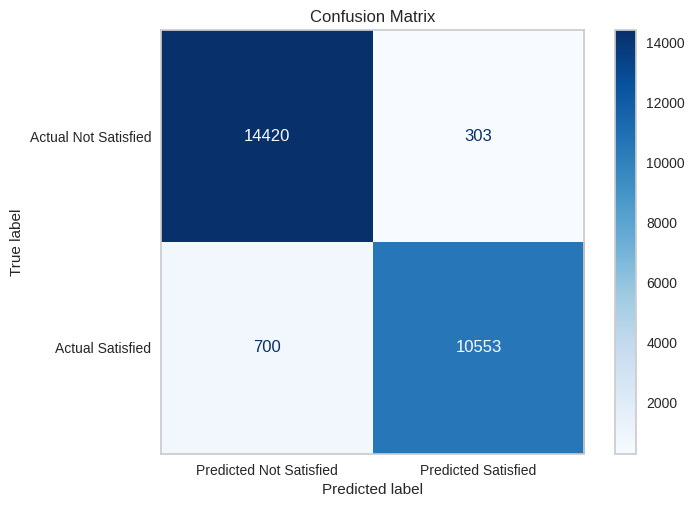

In [26]:
# Create Confusion mattrix to assess model performance
display = ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    cmap='Blues',
    display_labels=['Not Satisfied', 'Satisfied']
)
display.ax_.set_title("Confusion Matrix")
display.ax_.grid(False)
display.ax_.xaxis.set_ticklabels(['Predicted Not Satisfied', 'Predicted Satisfied'])
display.ax_.yaxis.set_ticklabels(['Actual Not Satisfied', 'Actual Satisfied'])

plt.show()

In [27]:
# Calculate ROC AUC score
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9938232897529332


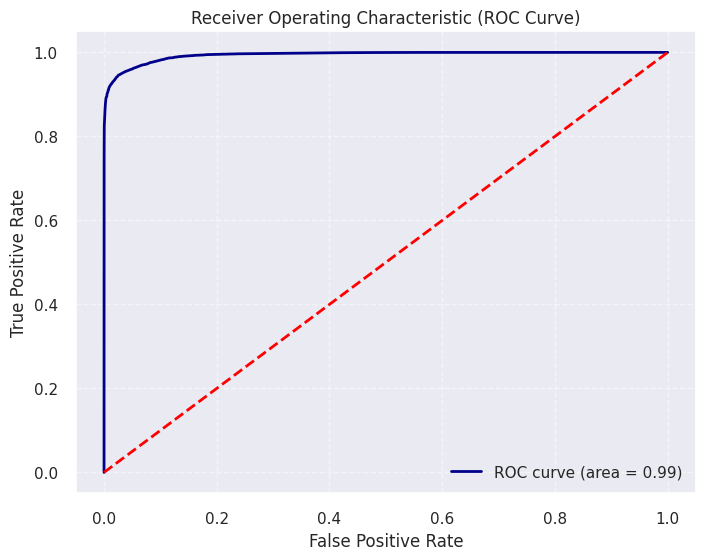

In [28]:
# Visualise the ROC Curve
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', linewidth=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

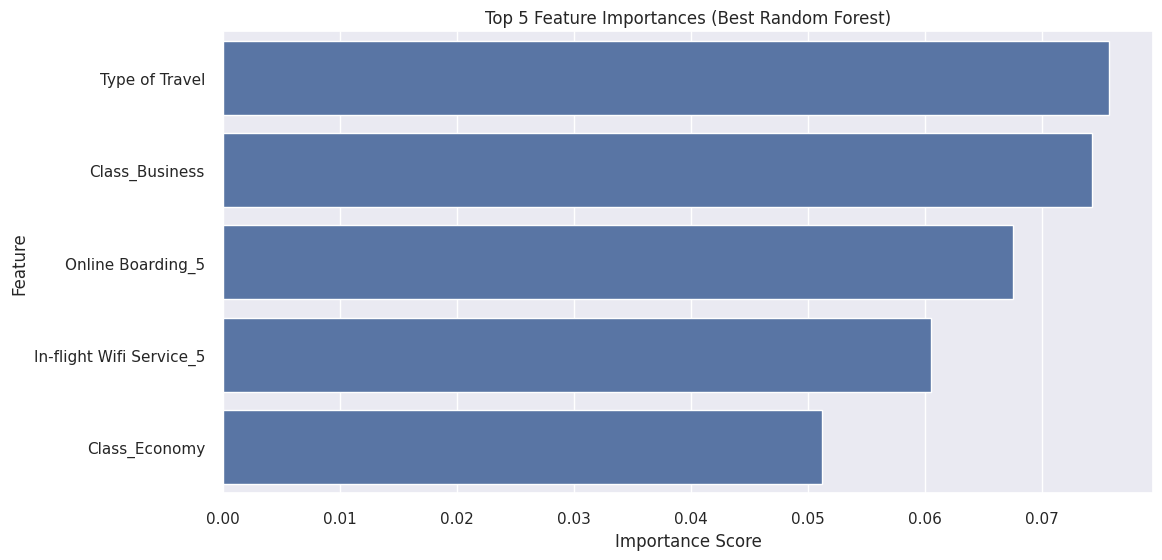

In [29]:
# Identify the Top 5 predictors the algorithm determined
best_rf = grid_search.best_estimator_

importances = best_rf.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.title('Top 5 Feature Importances (Best Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Extreme Gradient Boosting

Accuracy: 0.9645826917154297
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



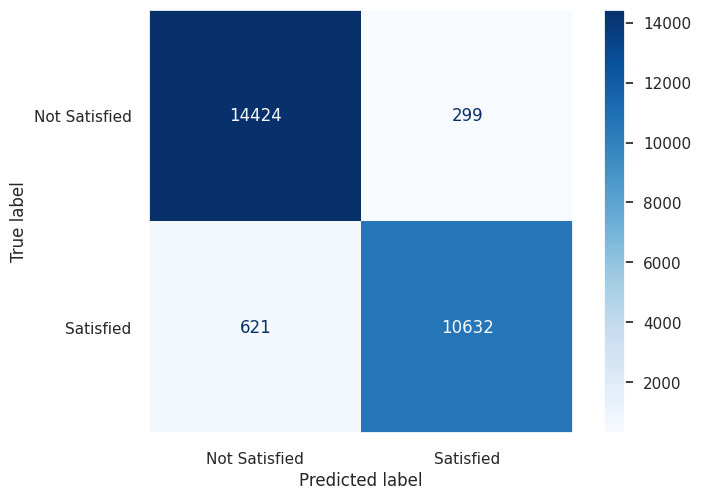

In [30]:
# Using Extreme Gradient Boosting to see if the model performs better
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

xgb_classifier = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred, target_names=['0', '1']))

fig, ax = plt.subplots()

cm_display = ConfusionMatrixDisplay.from_estimator(
    best_xgb_classifier,
    X_test,
    y_test,
    cmap='Blues',
    ax=ax,
    display_labels=['Not Satisfied', 'Satisfied']
)

ax.grid(False)
plt.show()

In [31]:
# Obtaining the ROC score for XGB Boost
y_pred_proba = best_xgb_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9951290491522892


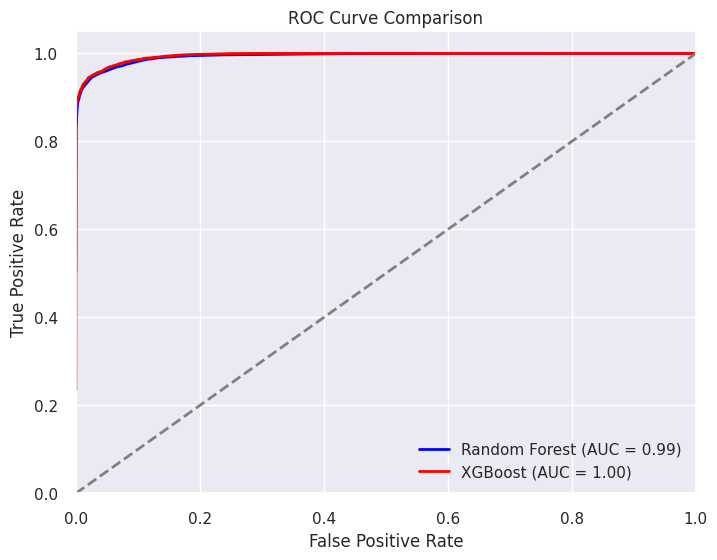

In [32]:
# Plotting the two models against each other to compare them
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_rf, y=tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

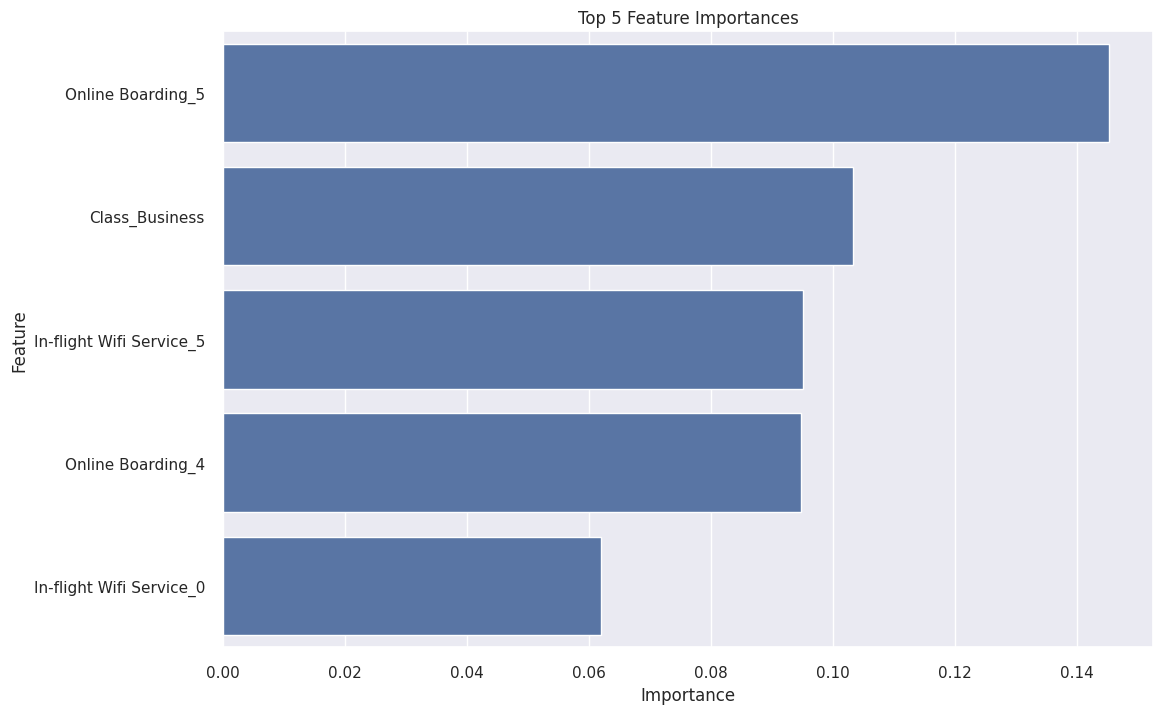

In [33]:
# Calculate Top 5 feature importance for XGB Boost
importances = best_xgb_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
# Generate a function to iterate through to create the following graphs
def plot_satisfaction_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=categorical_column, hue='Satisfaction',
                      palette={'Satisfied': 'b', 'Neutral or Dissatisfied': 'navy'},
                      data=df)

    neutral_or_dissatisfied_patches = [p for p in ax.patches
                                       if p.get_facecolor() == sns.color_palette("tab10")[0]]

    for patch in neutral_or_dissatisfied_patches:
        patch.set_alpha(0.5)

    counts = df[categorical_column].value_counts().to_dict()
    plt.gca().set_yticklabels([label.get_text() for label in plt.gca().get_yticklabels()])

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x/1000)))

    plt.title(f'Satisfaction by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel(categorical_column)
    ax.tick_params(left=False)
    ax.tick_params(bottom=False)
    plt.legend(title='Satisfaction')
    plt.show()

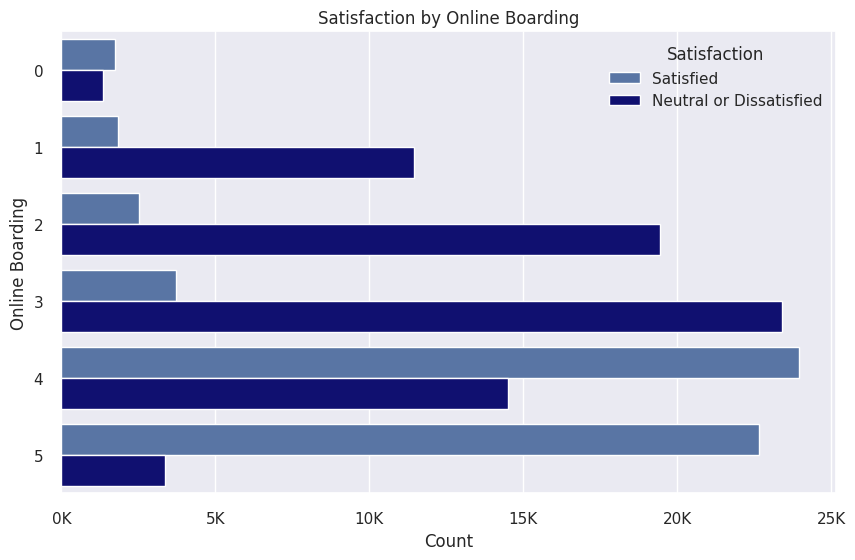

In [35]:
plot_satisfaction_by_category(df_original, 'Online Boarding')

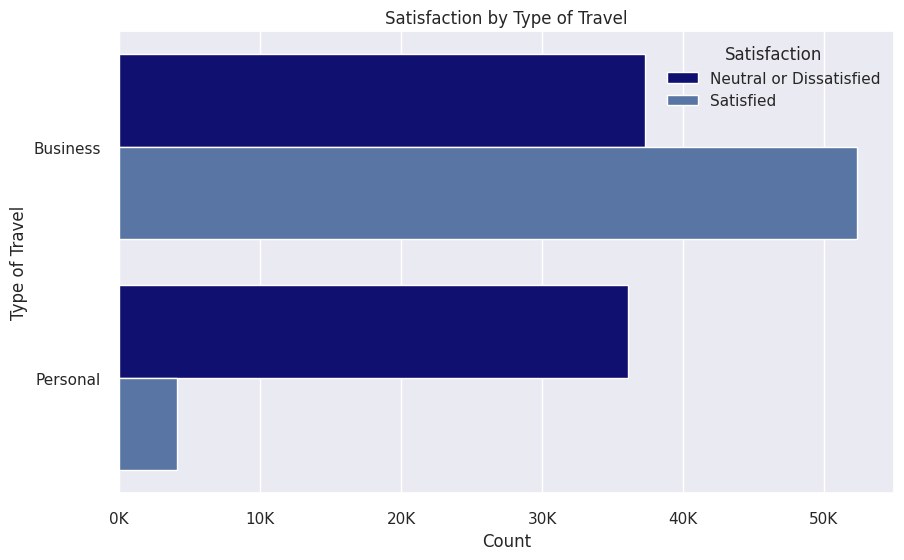

In [36]:
plot_satisfaction_by_category(df_original, 'Type of Travel')

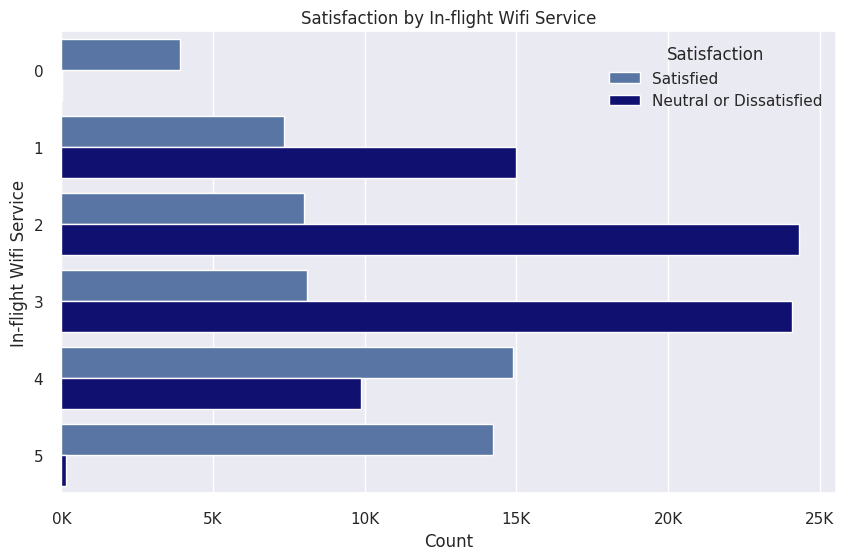

In [37]:
plot_satisfaction_by_category(df_original, 'In-flight Wifi Service')

### Unsupervised Learning

Identify customer segments based on customer demographics and the top 5 predictors of XGBoost model.

Scaling is required for Unsupervised Learning as values in different scales would would affect the results. In this dataset, the scales are,for example:

	•	Age (0–100 years)
	•	Flight Distance (0–10,000 miles)
	•	Satisfaction Ratings (1–5 points)

Without scaling, the flight distance would have a distorted level of importance in the cluster, skewing the results and potentially making them misleading.

In [38]:
df_clean.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Satisfaction,Class_Business,Class_Economy,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
0,0,0.566960,0,0,-0.370261,-0.333948,-0.263219,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.292868,1,0,-0.370261,0.296454,0.617623,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.103976,1,0,-0.338179,-0.386481,-0.392754,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.699242,1,0,0.716512,-0.386481,-0.392754,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.633101,1,0,2.285515,-0.386481,-0.366847,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# Preparing the data for Unsupervised Learning
clustering_features = ['Gender', 'Age', 'Type of Travel',
                       'Online Boarding_5', 'In-flight Wifi Service_5', 'Satisfaction']

X_cluster = df_clean[clustering_features]

In [40]:
# Calculate silhouette score using a sample of data points to reduce computational load
sample_size = 1000
sample_indices = np.random.choice(X_cluster.shape[0], size=sample_size, replace=False)

In [41]:
# Range of cluster values to test
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster.iloc[sample_indices], cluster_labels[sample_indices])
    silhouette_scores.append(score)

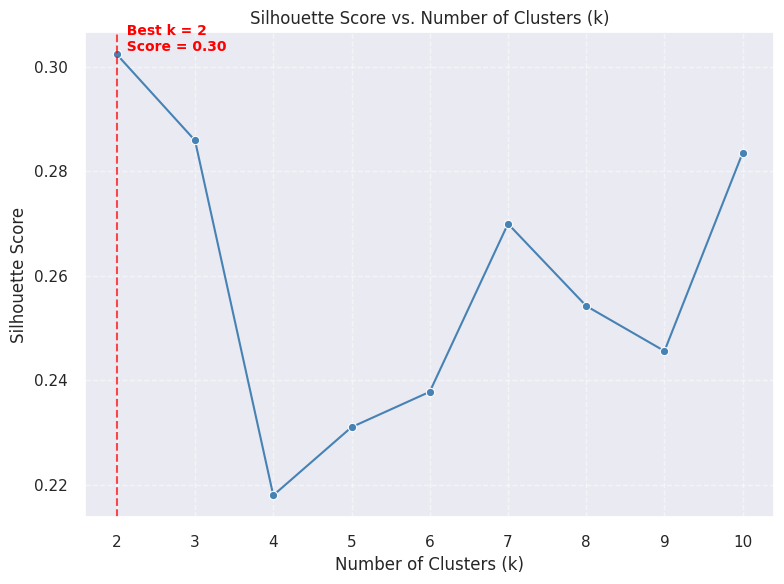

In [42]:
# Plot the graph to show the Silhouette Score
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', color='steelblue')

# Highlight the highest silhouette score
max_score_idx = silhouette_scores.index(max(silhouette_scores))
best_k = k_values[max_score_idx]
best_score = silhouette_scores[max_score_idx]

# Annotate the optimal k clearly on the plot
plt.axvline(x=best_k, linestyle='--', color='red', alpha=0.7)
plt.text(best_k, best_score, f'  Best k = {best_k}\n  Score = {best_score:.2f}',
         verticalalignment='bottom', color='red', fontsize=10, fontweight='bold')

plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

As the dataset is quite large, a sample of the dataset will be used to generate the images of the silhouette diagrams for 2 to 7 clusters to show how the clusters would be grouped.

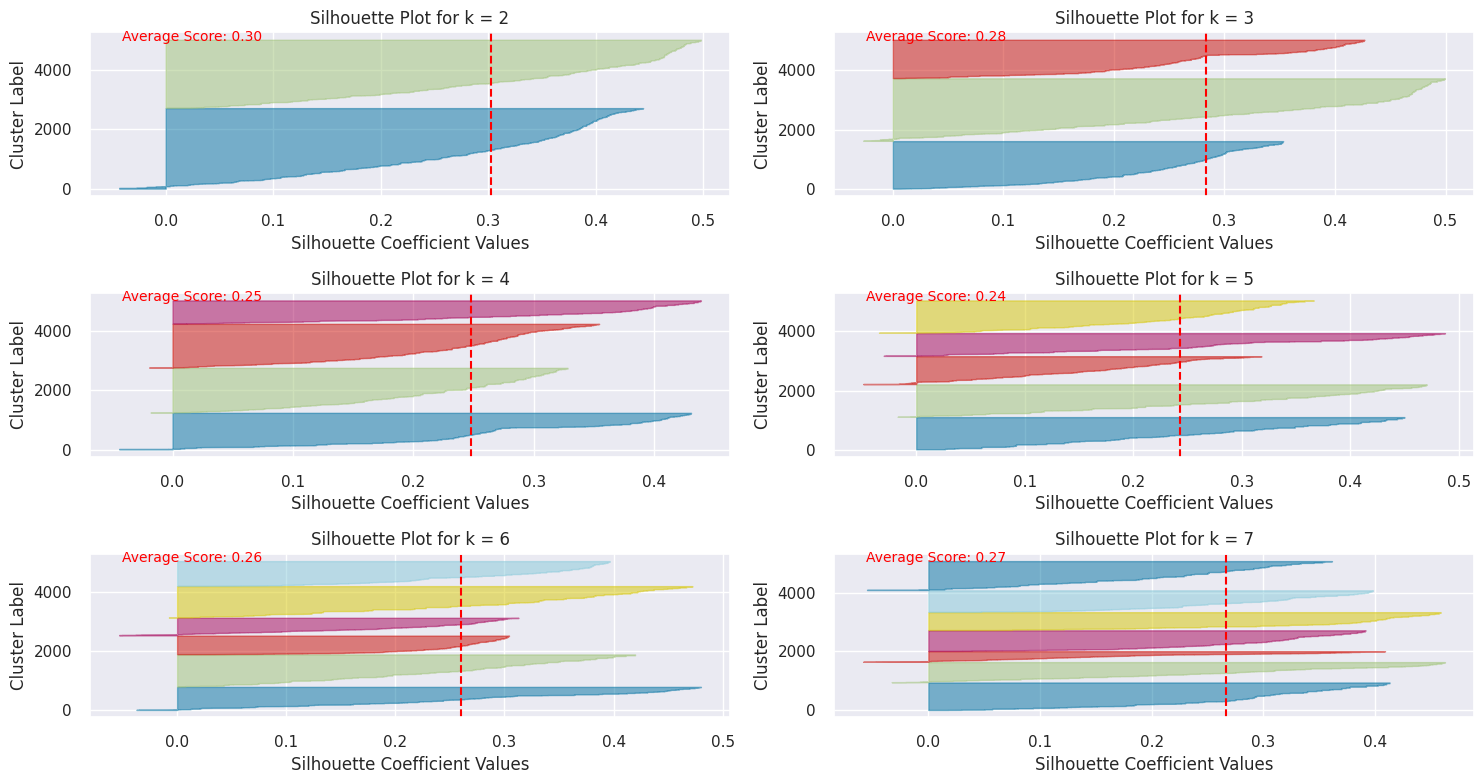

In [43]:
# Creating a diagram to show the spread of the data in each of the number of clusters
X_sample = X_cluster.sample(n=5000, random_state=42)

fig, ax = plt.subplots(3, 2, figsize=(15, 8))

for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(X_sample)
    visualizer.ax.set_title(f"Silhouette Plot for k = {i}")
    visualizer.ax.set_xlabel("Silhouette Coefficient Values")
    visualizer.ax.set_ylabel("Cluster Label")
    avg_score = visualizer.silhouette_score_
    visualizer.ax.text(0.05, 0.95, f"Average Score: {avg_score:.2f}",
                       transform=visualizer.ax.transAxes, color="red", fontsize=10)

plt.tight_layout()
plt.show()

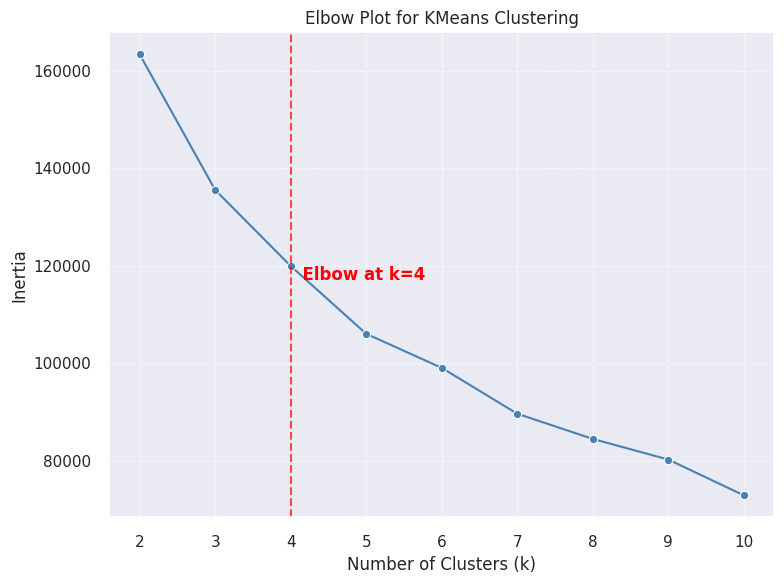

In [44]:
# Generating an Elbow Plot for KMeans Clustering
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia_values, marker='o', color='steelblue')

elbow_k = 4
elbow_inertia = inertia_values[k_values.index(elbow_k)]

plt.axvline(x=elbow_k, linestyle='--', color='red', alpha=0.7)
plt.text(elbow_k, elbow_inertia, f'  Elbow at k={elbow_k}',
         verticalalignment='top', color='red', fontsize=12, fontweight='bold')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

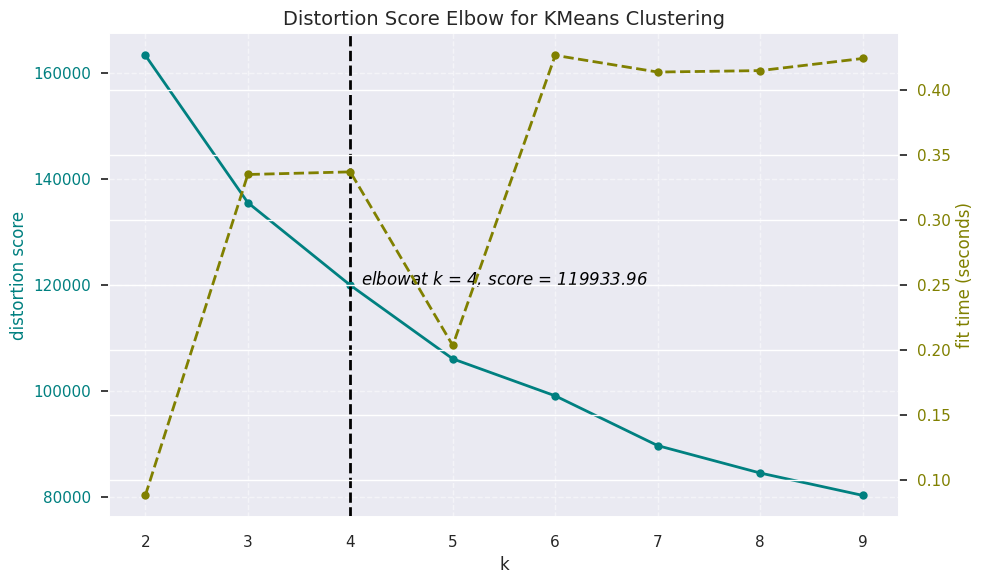

In [45]:
# Generating a Distortion Score graph
k_values = range(2, 10)
distortion_scores = []
fit_times = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    start_time = time.time()
    kmeans.fit(X_cluster)
    end_time = time.time()

    distortion_scores.append(kmeans.inertia_)
    fit_times.append(end_time - start_time)


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(k_values, distortion_scores, marker='o', color='teal', linewidth=2)
ax1.set_xlabel('k', fontsize=12)
ax1.set_ylabel('distortion score', color='teal', fontsize=12)
ax1.tick_params(axis='y', labelcolor='teal')

ax2 = ax1.twinx()
ax2.plot(k_values, fit_times, marker='o', color='olive', linestyle='--', linewidth=2)
ax2.set_ylabel('fit time (seconds)', color='olive', fontsize=12)
ax2.tick_params(axis='y', labelcolor='olive')


elbow_k = 4
ax1.axvline(x=elbow_k, linestyle='--', color='black', linewidth=2)
ax1.text(elbow_k + 0.1, distortion_scores[elbow_k - k_values[0]],
         f'$elbow at$ k = {elbow_k}, $score$ = {distortion_scores[elbow_k - k_values[0]]:.2f}',
         fontsize=12, fontstyle='italic', color='black')


plt.title('Distortion Score Elbow for KMeans Clustering', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [46]:
# Create a KMeans instance with k=2 and a random state for reproducibility
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
kmeans.fit(X_cluster)

KMeans(n_clusters=2, random_state=42)

In [47]:
# Add the cluster labels for each data point
cluster_labels = kmeans.labels_
X_cluster['Cluster'] = cluster_labels

In [48]:
df_clean['Cluster'] = cluster_labels

In [49]:
# Create a function to iterate through to create the following graphs
def plot_cluster_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))

    unique_categories = sorted(df_clean[categorical_column].unique())
    palette = ['blue', 'navy']

    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df_clean
    )

    num_categories = len(unique_categories)
    num_clusters = df_clean['Cluster'].nunique()

    patches = ax.patches
    for i, patch in enumerate(patches):
        hue_category_index = i // num_clusters
        if hue_category_index == 0:
            patch.set_alpha(0.5)
        else:
            patch.set_alpha(1.0)

    handles, labels = ax.get_legend_handles_labels()
    labels = [str(cat) for cat in unique_categories]
    ax.legend(handles, labels, title=categorical_column, loc='best')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [50]:
# Create Cluster Plots for Age and Flight Distance
plt.figure(figsize=(10, 7))

# Assign the 'Cluster' column to df_feature_eng
df_feature_eng['Cluster'] = df_clean['Cluster']

sns.scatterplot(
    data=df_feature_eng,
    x='Age',
    y='Flight Distance',
    hue='Cluster',
    palette='Set1',
    alpha=0.6,
    s=50  # Marker size
)

# Clearly mark cluster centers
X_for_clustering = df_feature_eng[['Age', 'Flight Distance']]

# Compute centers
kmeans = KMeans(n_clusters=df_feature_eng['Cluster'].nunique(), random_state=42)
kmeans.fit(X_for_clustering)
centers = kmeans.cluster_centers_

# Plot cluster centers clearly
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Cluster Centers')

plt.title('Clusters of Passengers by Age and Flight Distance', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Flight Distance', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'df_feature_eng' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
plot_cluster_by_category(df_clean, 'Gender')

In [ ]:
def plot_cluster_by_category(df, categorical_column, legend_table):
    plt.figure(figsize=(10, 6))

    mapping_df = legend_table[legend_table["Column Name"] == categorical_column]
    value_mapping = dict(zip(mapping_df["Encoded Value"], mapping_df["Original Value"]))

    df_temp = df.copy()
    df_temp[categorical_column] = df_temp[categorical_column].map(value_mapping)

    unique_categories = list(df_temp[categorical_column].unique())
    palette = ['blue', 'navy'] if len(unique_categories) == 2 else sns.color_palette('husl', len(unique_categories))

    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df_temp
    )

    num_clusters = df_temp['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories, title=categorical_column, loc='best')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_cluster_by_category(df_clean, 'Gender', legend_table)

In [ ]:
plot_cluster_by_category(df_clean, 'Satisfaction', legend_table)

In [ ]:
plot_cluster_by_category(df_clean, 'Type of Travel', legend_table)

In [ ]:
def plot_cluster_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))

    unique_categories = sorted(df[categorical_column].unique())

    palette = sns.color_palette("Blues_d", n_colors=len(unique_categories))

    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df
    )

    num_clusters = df['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories, title=categorical_column, loc='best')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
df_cluster_analysis = df_clean.copy()

online_boarding_cols = [col for col in df_cluster_analysis.columns if col.startswith('Online Boarding_')]
df_cluster_analysis['Online Boarding (Original)'] = df_cluster_analysis[online_boarding_cols].idxmax(axis=1).str.split('_').str[-1].astype(int)

plot_cluster_by_category(df_cluster_analysis, 'Online Boarding (Original)')

In [ ]:
def plot_cluster_by_category(df, categorical_column):
    original_col_name = categorical_column + ' (Original)'
    plotting_column = original_col_name if original_col_name in df.columns else categorical_column

    if plotting_column in df.columns:
        unique_categories = sorted(df[plotting_column].unique())
    else:
        print(
            f"Warning: Column '{categorical_column}' and its encoded versions not found in DataFrame. Skipping plot.")
        return

    palette = sns.color_palette("Blues_d", n_colors=len(unique_categories))

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        y='Cluster',
        hue=plotting_column,
        palette=palette,
        data=df
    )

    num_clusters = df['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories,
              title=categorical_column, loc='best')

    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


def revert_one_hot_encoding(df):
    relevant_cols = ['Online Boarding', 'Type of Travel',
                    'In-flight Wifi Service', 'In-flight Service']
    for col in relevant_cols:
        encoded_cols = [c for c in df.columns if c.startswith(
            col + '_')]
        if encoded_cols:
            original_col_name = col + ' (Original)'
            if original_col_name not in df.columns:
                df[original_col_name] = pd.Series(
                    dtype='object')

                for encoded_col in encoded_cols:
                    original_value = encoded_col.split('_')[
                        1]

                    try:
                        original_value = int(
                            original_value)
                    except ValueError:
                        pass

                    condition = df[encoded_col] == 1
                    df.loc[condition,
                           original_col_name] = original_value

                if col == 'In-flight Service':
                    df[original_col_name] = pd.to_numeric(
                        df[original_col_name], errors='coerce').astype(pd.Int64Dtype())
    return df

df_cluster_analysis = revert_one_hot_encoding(df_cluster_analysis)
plot_cluster_by_category(
    df_cluster_analysis, 'In-flight Wifi Service')

In [ ]:
# Examining the Clusters by Age
original_age_values = scaler.inverse_transform(df_cluster_analysis[numerical_cols])[:, numerical_cols.index('Age')]

df_cluster_analysis['Age (Original)'] = original_age_values

fig, axes = plt.subplots(1, df_cluster_analysis['Cluster'].nunique(), figsize=(15, 5), sharey=True)
axes = axes.flatten() if df_cluster_analysis['Cluster'].nunique() > 1 else [axes]

for i, cluster in enumerate(df_cluster_analysis['Cluster'].unique()):
    cluster_data = df_cluster_analysis[df_cluster_analysis['Cluster'] == cluster]
    sns.histplot(cluster_data['Age (Original)'], bins=20, kde=True, color='blue', alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Count" if i == 0 else "")
    axes[i].set_xlim(0, 100)
    axes[i].lines[0].set_color('navy')


fig.suptitle('Distribution of Age by Cluster', fontsize=16, y=1.05, ha='center')
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# Create a Feature Engineering visualisation for Long Delay (>30 mins) for Satisfaction
df_feature_eng = df_original.copy()

# Feature engineering: create 'Long Delay' feature (binary: 1 if Arrival Delay > 30 mins, else 0)
df_feature_eng["Long Delay"] = (df_feature_eng["Arrival Delay"] > 30).astype(int)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_feature_eng, x="Long Delay", hue="Satisfaction", palette="coolwarm")
plt.xticks([0, 1], ['Arrival Delay ≤ 30 mins', 'Arrival Delay > 30 mins'])
plt.xlabel("Long Delay")
plt.ylabel("Number of Passengers")
plt.title("Impact of Long Arrival Delay (>30 mins) on Passenger Satisfaction")
plt.legend(title='Satisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Corrected code, using actual categorical labels
df_feature_eng["Loyal Business Traveler"] = (
    (df_feature_eng["Customer Type"] == "Returning") &
    (df_feature_eng["Type of Travel"] == "Business")
).astype(int)

# Quick check to ensure feature created correctly
print(df_feature_eng["Loyal Business Traveler"].value_counts().astype(int))

# Visualize satisfaction by Traveler Type clearly
plt.figure(figsize=(8, 6))
sns.countplot(data=df_feature_eng, x="Loyal Business Traveler", hue="Satisfaction", palette="pastel")

plt.xticks([0, 1], ['Others', 'Loyal Business Travelers'])
plt.xlabel("Traveler Type")
plt.ylabel("Number of Passengers")
plt.title("Passenger Satisfaction by Traveler Type (Loyal Business Travelers vs Others)")
plt.legend(title='Satisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()